## Cyclic Curve

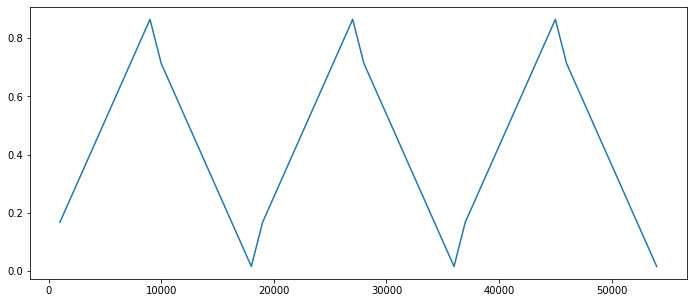

In [0]:
from cycliclr import plot_cyclic_curve

iterations = 10010
stepsize = 1000
lr_min = 0.08
lr_max = 0.8

plot_cyclic_curve(iterations, stepsize, lr_min, lr_max)

## Model

In [0]:
!pip install albumentations==0.4.5

import torch
import torch.nn as nn
import torch.nn.functional as F

!pip install torchsummary
from torchsummary import summary

from models.S11model import S11Cifar10DNN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = S11Cifar10DNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Run the Model

In [0]:
%matplotlib inline

In [0]:
import torch.nn as nn

from dataloader import ImageData
from models.resnet18 import ResNet18
from datamodel import DataModel
from optimizer import OptimizerFactory

from torch.optim.lr_scheduler import OneCycleLR

# Loading data and transforming it
img_data = ImageData()

# Choose from "albumentations" or "pytorch". Default is "pytorch"
img_data.load("albumentations")

criterion = nn.CrossEntropyLoss()

# optimizer can be choose from "SGD" & "Adam"
optim_sgd = OptimizerFactory("SGD")
optimizer = optim_sgd.load(params=model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

dm = DataModel(img_data, criterion, optimizer, None, num_of_epochs = 24, cal_misclassified = True)

  pip install torch-lr-finder -v --global-option="amp"


CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


### Find LR Max

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


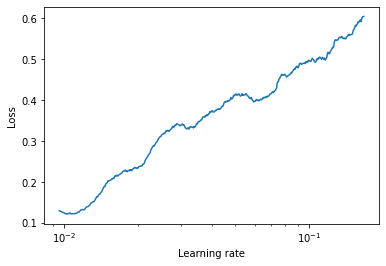

In [0]:
lr = dm.find_lr_max(model, device)

### LR Max

In [0]:
print(lr)

0.010264425840491176


## Run Model

In [0]:
# training the dataset and then running test
scheduler = OneCycleLR(optimizer, max_lr=lr, epochs=24, steps_per_epoch = len(img_data.trainloader), 
                          anneal_strategy='cos',
                          base_momentum=0.85,
                          cycle_momentum=True,
                          div_factor=10,
                          final_div_factor=10000.0,
                          last_epoch=-1,
                          max_momentum=0.95,
                          pct_start=0.3
                        )
dm.schedular = scheduler
dm.optimizer = optim_sgd.load(params=model.parameters(), lr=lr/8, momentum=0.9, weight_decay=0.005)
dm.run_model(model, device)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Loss=1.8123526573181152 Batch_id=97 Accuracy=23.72: 100%|██████████| 98/98 [00:25<00:00,  3.91it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 3335/10000 (33.35%)

EPOCH: 2


Loss=1.2533771991729736 Batch_id=97 Accuracy=45.75: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 4658/10000 (46.58%)

EPOCH: 3


Loss=0.995195209980011 Batch_id=97 Accuracy=60.28: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 6637/10000 (66.37%)

EPOCH: 4


Loss=0.771294891834259 Batch_id=97 Accuracy=70.26: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 6964/10000 (69.64%)

EPOCH: 5


Loss=0.6243316531181335 Batch_id=97 Accuracy=75.76: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7670/10000 (76.70%)

EPOCH: 6


Loss=0.5648126602172852 Batch_id=97 Accuracy=80.01: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7715/10000 (77.15%)

EPOCH: 7


Loss=0.48445165157318115 Batch_id=97 Accuracy=82.58: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8073/10000 (80.73%)

EPOCH: 8


Loss=0.4774601459503174 Batch_id=97 Accuracy=84.29: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8348/10000 (83.48%)

EPOCH: 9


Loss=0.40580859780311584 Batch_id=97 Accuracy=86.25: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8510/10000 (85.10%)

EPOCH: 10


Loss=0.38112518191337585 Batch_id=97 Accuracy=87.86: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8380/10000 (83.80%)

EPOCH: 11


Loss=0.33709850907325745 Batch_id=97 Accuracy=88.80: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8282/10000 (82.82%)

EPOCH: 12


Loss=0.2955736517906189 Batch_id=97 Accuracy=89.79: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8407/10000 (84.07%)

EPOCH: 13


Loss=0.255968302488327 Batch_id=97 Accuracy=91.00: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8661/10000 (86.61%)

EPOCH: 14


Loss=0.23965635895729065 Batch_id=97 Accuracy=91.71: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8662/10000 (86.62%)

EPOCH: 15


Loss=0.26648208498954773 Batch_id=97 Accuracy=92.46: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8737/10000 (87.37%)

EPOCH: 16


Loss=0.1679265797138214 Batch_id=97 Accuracy=92.93: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8743/10000 (87.43%)

EPOCH: 17


Loss=0.16161642968654633 Batch_id=97 Accuracy=93.73: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8725/10000 (87.25%)

EPOCH: 18


Loss=0.206429123878479 Batch_id=97 Accuracy=94.28: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8594/10000 (85.94%)

EPOCH: 19


Loss=0.13296449184417725 Batch_id=97 Accuracy=94.50: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8729/10000 (87.29%)

EPOCH: 20


Loss=0.16887283325195312 Batch_id=97 Accuracy=95.01: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8746/10000 (87.46%)

EPOCH: 21


Loss=0.13223068416118622 Batch_id=97 Accuracy=95.37: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8741/10000 (87.41%)

EPOCH: 22


Loss=0.16066919267177582 Batch_id=97 Accuracy=95.77: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8571/10000 (85.71%)

EPOCH: 23


Loss=0.12327279150485992 Batch_id=97 Accuracy=95.54: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8817/10000 (88.17%)

EPOCH: 24


Loss=0.15153944492340088 Batch_id=97 Accuracy=96.01: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]



Test set: Average loss: 0.0007, Accuracy: 8826/10000 (88.26%)



## Plotting Test & Train Accuracy

[23.722, 45.746, 60.284, 70.26, 75.758, 80.006, 82.582, 84.292, 86.254, 87.858, 88.796, 89.794, 91.004, 91.71, 92.46, 92.926, 93.732, 94.282, 94.498, 95.006, 95.374, 95.766, 95.542, 96.01]
[33.35, 46.58, 66.37, 69.64, 76.7, 77.15, 80.73, 83.48, 85.1, 83.8, 82.82, 84.07, 86.61, 86.62, 87.37, 87.43, 87.25, 85.94, 87.29, 87.46, 87.41, 85.71, 88.17, 88.26]


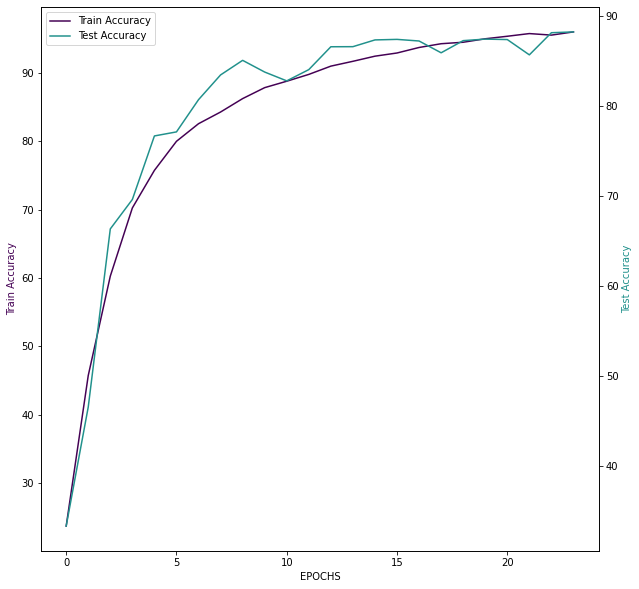

In [0]:
dm.plot_test_train_accuracy()

## Plotting Validation Accuracy

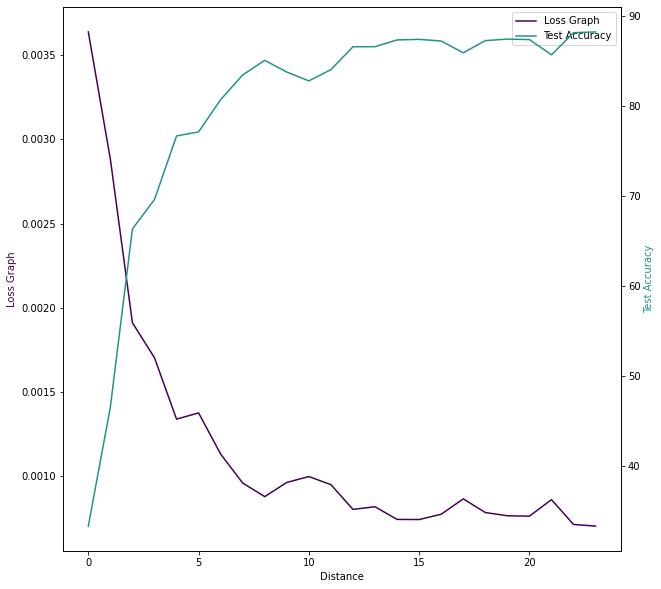

In [0]:
dm.plot_loss_accuracy()

## Plotting Misclassified Images

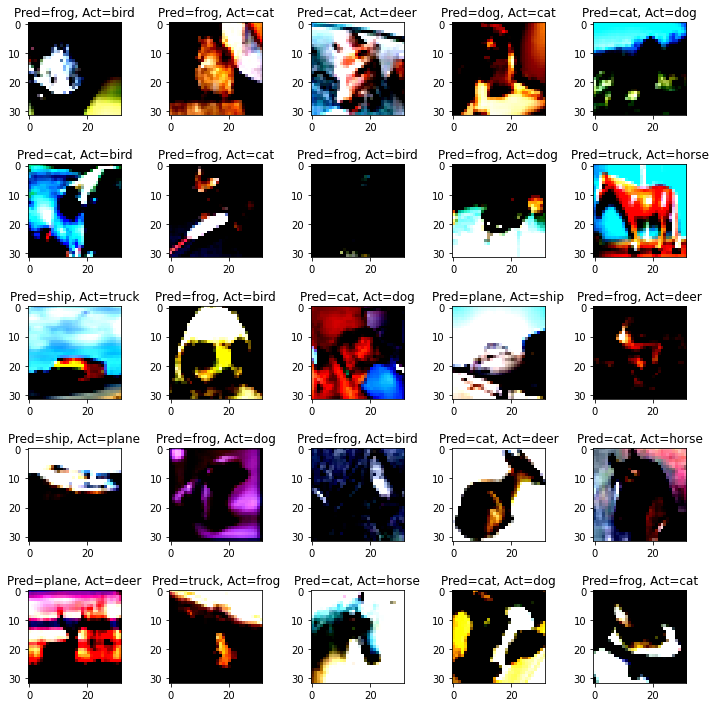

In [0]:
dm.plot_misclassified()

/content/gradcam.py:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  subplot_kw={'xticks': [], 'yticks': []})


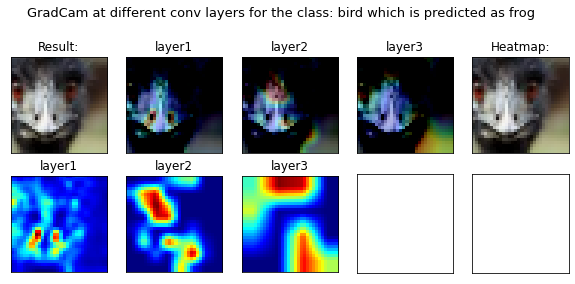

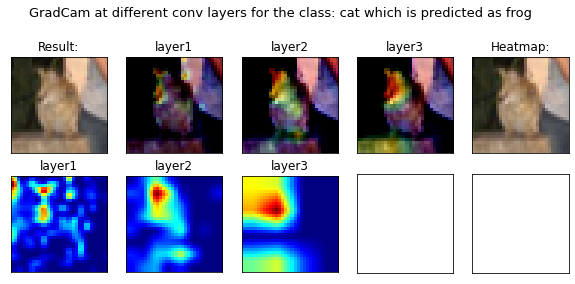

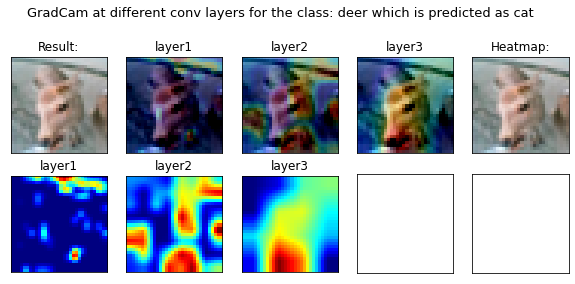

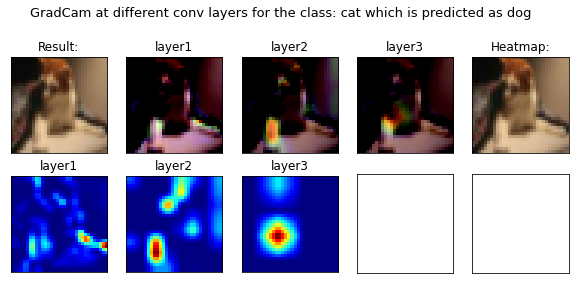

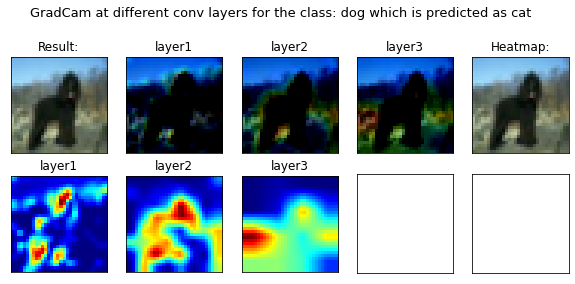

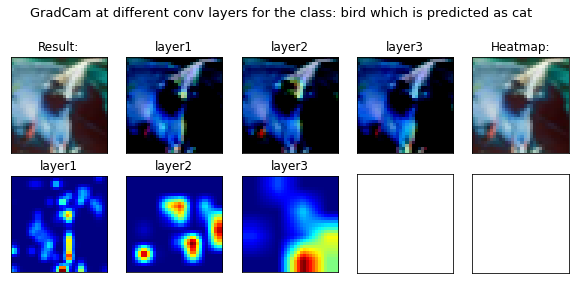

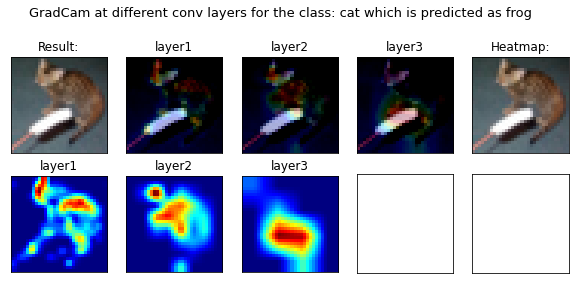

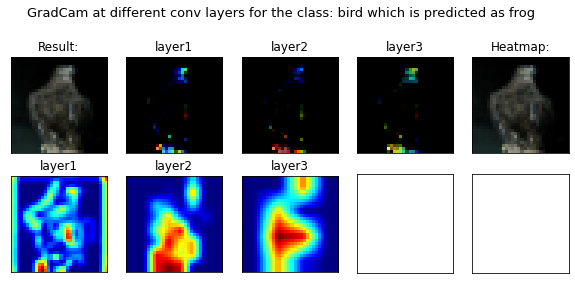

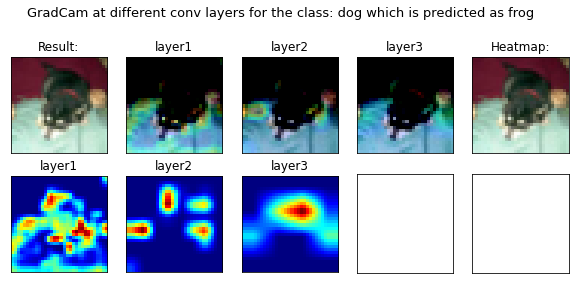

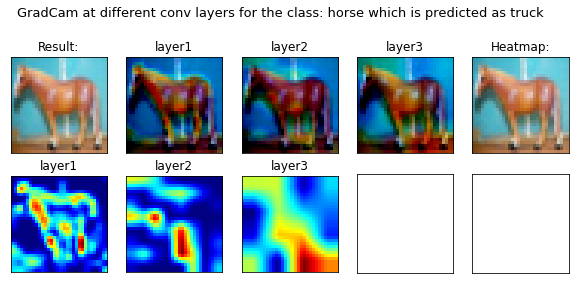

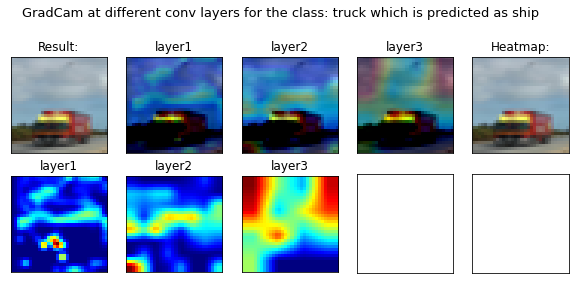

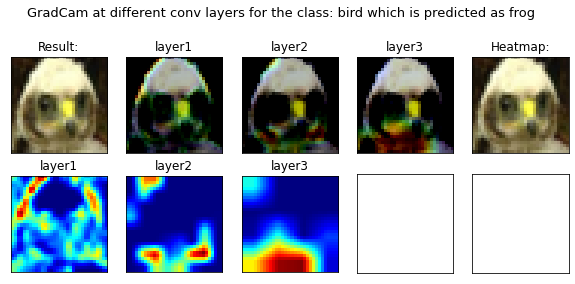

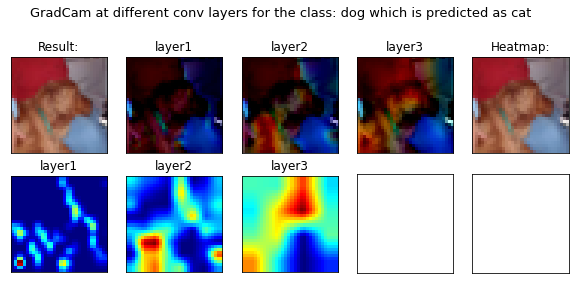

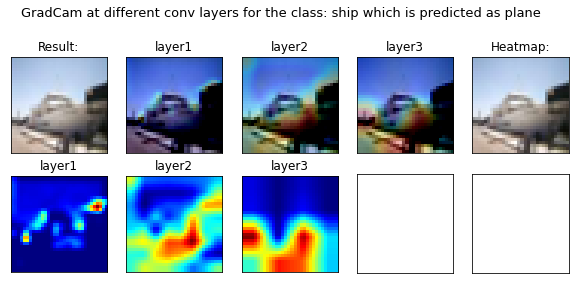

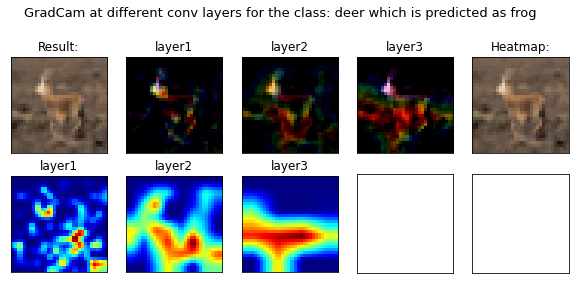

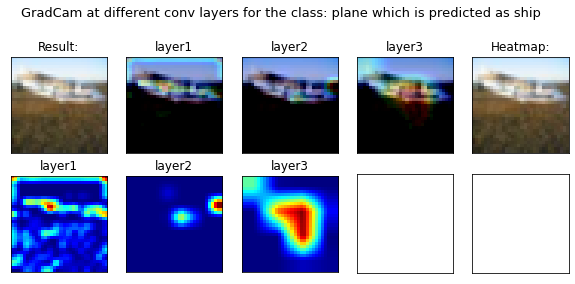

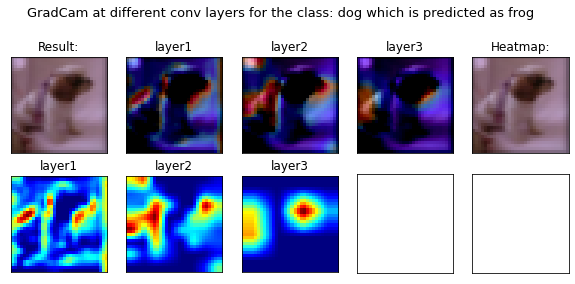

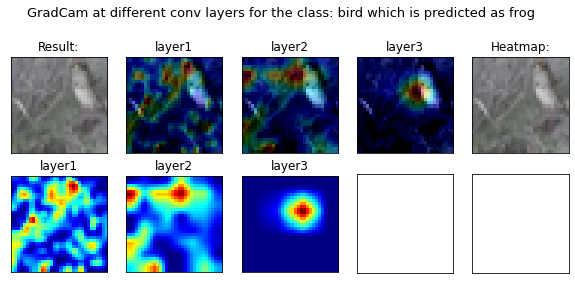

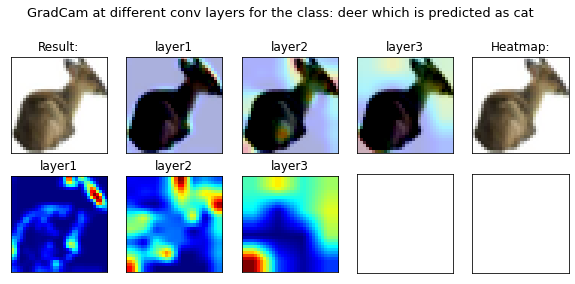

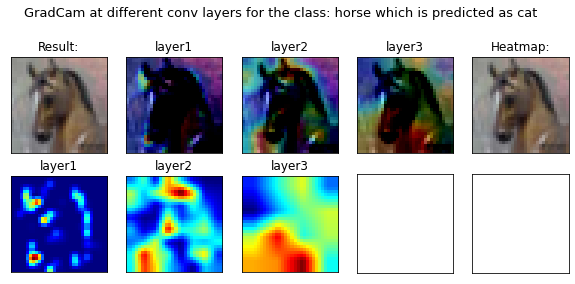

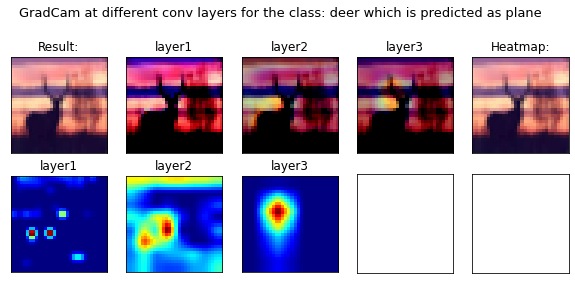

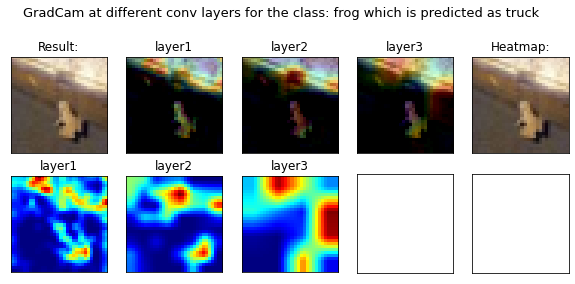

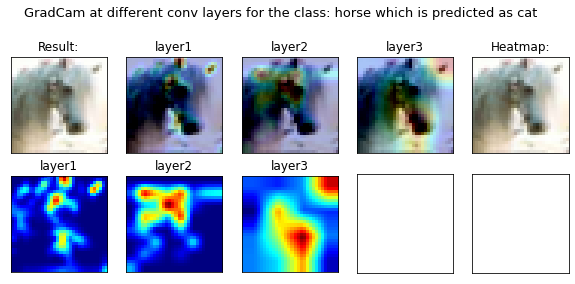

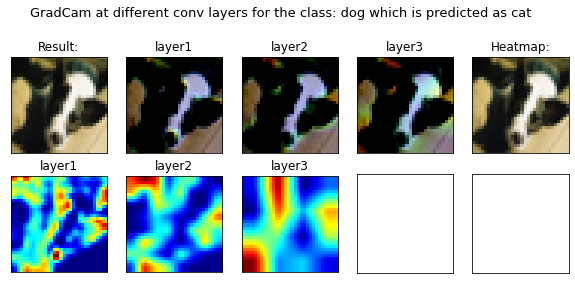

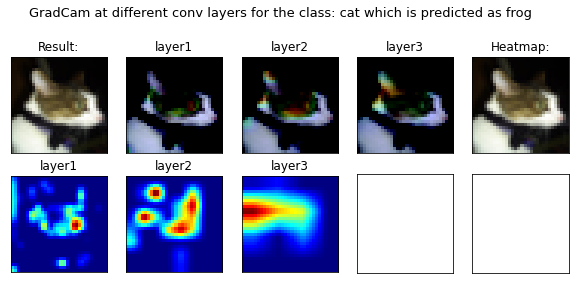

In [0]:
dm.plot_GRADcam(["layer1","layer2","layer3"])